<a href="https://colab.research.google.com/github/MavinSao/Depression-Detection/blob/main/ML_Depression_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer


from sklearn.model_selection import train_test_split
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
#Data Processing
df = pd.read_csv('Mental-Health-Twitter.csv')
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [3]:
# Drop unuse column
df = df[['post_text','label']]
df.head()

,post_text,label
0,It's just over 2 years since I was diagnosed w...,1
1,"It's Sunday, I need a break, so I'm planning t...",1
2,Awake but tired. I need to sleep but my brain ...,1
3,RT @SewHQ: #Retro bears make perfect gifts and...,1
4,It’s hard to say whether packing lists are mak...,1


In [4]:
# Initialize NLTK's objects for stemming and lemmatization
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
# Function to perform stemming, lemmatization, and remove stopwords
def preprocess_text(text):
    # Remove URLs, links, and punctuation
    text = re.sub(r'http\S+|www\S+|<.*?>', '', text)  # Remove URLs and links
    text = re.sub(r'\[.*?\]\(.*?\)', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\bRT\b|\bNT\b', '', text,flags=re.IGNORECASE)
    # Tokenize the text
    words = word_tokenize(text)

    # Perform stemming, lemmatization, and remove stopwords
    words = [stemmer.stem(lemmatizer.lemmatize(word)) for word in words if word.lower() not in stopwords.words('english')]

    return ' '.join(words)

In [9]:
# Apply the preprocessing function to the 'post_text' column
df['post_text'] = df.loc[:,'post_text'].apply(preprocess_text)

In [10]:
df.head()

,post_text,label
0,2 year sinc diagnos anxieti depress today im t...,1
1,sunday need break im plan spend littl time pos...,1
2,awak tire need sleep brain idea,1
3,sewhq retro bear make perfect gift great begin...,1
4,hard say whether pack list make life easier re...,1


In [11]:
#2 Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['post_text'], df['label'], test_size=0.3, random_state=42)

In [13]:
#3: Vectorize the text data (convert text to numerical features)
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the max_features parameter
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [15]:
#4 Train and evaluate models
#4.1 Logistic Regression

lr_model = LogisticRegression()
lr_model.fit(X_train_vec, y_train)
lr_pred = lr_model.predict(X_test_vec)

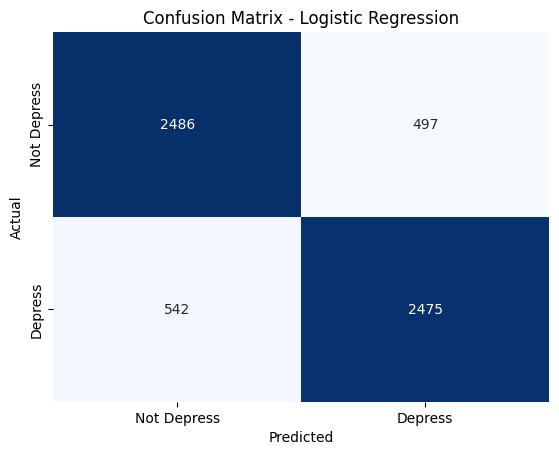

In [19]:
#Create a confusion matrix
cm = confusion_matrix(y_test, lr_pred)

#Plot the confusion matrix using Seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Depress', 'Depress'],
            yticklabels=['Not Depress', 'Depress'])

plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f"Logistic Regression Test Accuracy: {lr_accuracy}")

Logistic Regression Test Accuracy: 0.8268333333333333


In [22]:
#4.2 Naive Bayes

nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
nb_pred = nb_model.predict(X_test_vec)
nb_accuracy = accuracy_score(y_test, nb_pred)
print(f"Naive Bayes Test Accuracy: {nb_accuracy}")

Naive Bayes Test Accuracy: 0.8375


In [23]:
#4.3 Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train_vec, y_train)
svm_pred = svm_model.predict(X_test_vec)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Test Accuracy: {svm_accuracy}")

SVM Test Accuracy: 0.8423333333333334
